# Production Function Exercises

See “Check Your Understanding” from [Control Flow](https://datascience.quantecon.org/../python_fundamentals/control_flow.html), [Functions](https://datascience.quantecon.org/../python_fundamentals/functions.html), and [Introduction to Numpy](https://datascience.quantecon.org/../scientific/numpy_arrays.html)

## CES Production Function

This example is meant to be helpful for problem set 3. 

Another common form of production function is the constant elasticity of substitution (CES) production function. The CES production function

$$ F(K, L) = z \left( (1-\alpha) K^{-\rho} + \alpha L^{-\rho} \right)^{-\tau/\rho} $$.

It takes as an argument `alpha_1`, `alpha_2`, and `z` and then *returns a function* that implements that parameterization of the Cobb-Douglas production function.

In [7]:
def ces_factory(alpha, rho, tau=1.0, z=1.0):
    """
    Return a function F(K, L) that implements the CES
    production function with parameters alpha, rho, tau, and z

    The returned function takes the form 
    F(K, L) = z \left( (1-alpha) K^{-rho} + alpha L^{-rho} \right)^{-tau/rho}
    """
    # I'm defining a function inside a function
    def F(K, L):
        return z * ((1-alpha)*K**(-rho) +  alpha*L**(-rho))**(-tau/rho)

    # Notice I'm returning a function! :mind_blown:
    return F

We can use this function in two steps:

1. Call it with `alpha`, `rho`, `tau`, and `z` and get a function in return.  
1. Call the returned function with values of `K` and `L`.  


Here’s an example

In [19]:
# step 1
alpha = 0.5
rho = 2.0
tau = 1.0

F = ces_factory(alpha, rho, tau)

# step 2
F(1.0, 0.5)

0.6324555320336759

## Plotting Output

Let's plot output as a function of `K` with `L=1`.

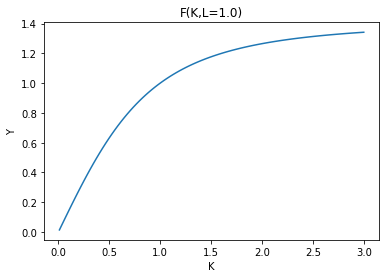

In [9]:
import numpy as np
import matplotlib.pyplot as plt
L = 1.0
K = np.linspace(0.01,3.0,100)
Y = [F(k,L) for k in K]
fig, ax = plt.subplots()
ax.plot(K,Y)
ax.set_xlabel("K")
ax.set_ylabel("Y")
ax.set_title(f"F(K,L={L})")
fig;

## Returns to Scale

Let's investigate the returns to scale for the CES production function.

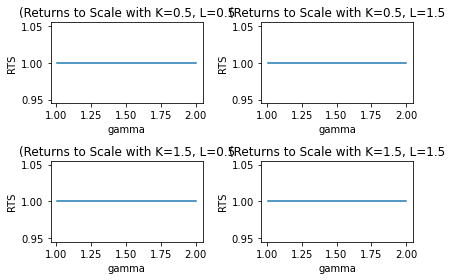

In [20]:
def returns_to_scale(F, K, L, gamma):
    return( F(gamma*K, gamma*L)/F(K,L) / gamma )

def rts_plot(ax, F, K=1.0, L=1.0) :
    gamma = np.linspace(1.01,2,50)
    rts = [returns_to_scale(F, K, L, g) for g in gamma]
    ax.plot(gamma, rts)
    ax.set_xlabel("gamma")
    ax.set_ylabel("RTS")
    ax.set_title(f"(Returns to Scale with K={K}, L={L}")
    return(ax)

fig, ax = plt.subplots(2,2)
K = [0.5, 1.5]
L = [0.5, 1.5]
for i in range(2):
    for j in range(2):
        rts_plot(ax[i,j],F, K[i],L[j])
        
fig.tight_layout();

With `tau=1` and `rho=2`, the CES production function has constant returns to scale. 

What happens if we vary these parameters?

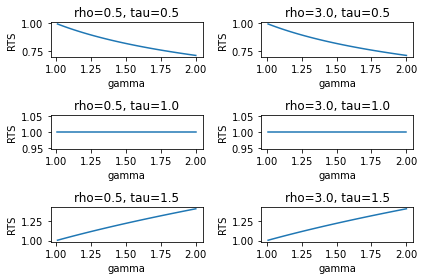

In [23]:
taus = [0.5, 1.0, 1.5]
rhos = [0.5, 3.0]
fig, ax = plt.subplots(len(taus),len(rhos))
K = 1.0
L=1.0
for i,t in enumerate(taus):
    for j,r in enumerate(rhos): 
        rts_plot(ax[i,j],ces_factory(alpha,r,t), K,L)
        ax[i,j].set_title(f"rho={r}, tau={t}")
fig.tight_layout()


So we see that returns to scale are increasing if `tau>1` and decreasing if `tau<1`.

## Marginal Product of Capital

The marginal production of capital the derivative of output with respect to capital. We can numerically approximate the derivative by taking finite differences.

In [35]:
def numderiv(f, x, delta=1e-6):
    return((f(x+delta) - f(x))/delta)

alpha = 0.5
rho = 2
tau = 1
F = ces_factory(alpha, rho, tau)
L = 1.5
K = 0.5
MPK = numderiv(lambda k: F(k,L), K)
MPK

1.207476345577163

Text(0.5, 1.0, 'Marginal Product of Capital')

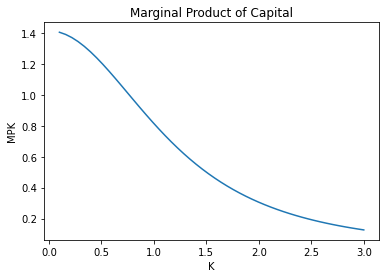

In [36]:
K = np.linspace(0.1, 3, 50)
fig, ax=plt.subplots()
ax.plot(K,[numderiv(lambda k: F(k,L), k) for k in K])
ax.set_xlabel("K")
ax.set_ylabel("MPK")
ax.set_title("Marginal Product of Capital")